In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35


In [4]:
df.isnull().sum()

WEEK_END_DATE     0
STORE_NUM         0
UPC               0
PRICE             3
BASE_PRICE       12
FEATURE           0
DISPLAY           0
UNITS             0
dtype: int64

In [5]:
df.describe()

,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
count,232287.000000,2.322870e+05,232284.000000,232275.000000,232287.000000,232287.000000,232287.000000
mean,14676.437463,3.633352e+09,3.131375,3.345204,0.099889,0.135001,28.063525
std,8841.382984,4.840891e+09,1.562371,1.678181,0.299853,0.341725,35.954341
min,367.000000,1.111009e+09,0.580000,0.860000,0.000000,0.000000,0.000000
25%,6187.000000,1.111085e+09,1.880000,1.950000,0.000000,0.000000,9.000000
50%,15541.000000,1.600028e+09,2.890000,2.990000,0.000000,0.000000,18.000000
75%,23067.000000,3.800039e+09,3.870000,4.080000,0.000000,0.000000,34.000000
max,29159.000000,3.125474e+10,7.890000,7.890000,1.000000,1.000000,1800.000000


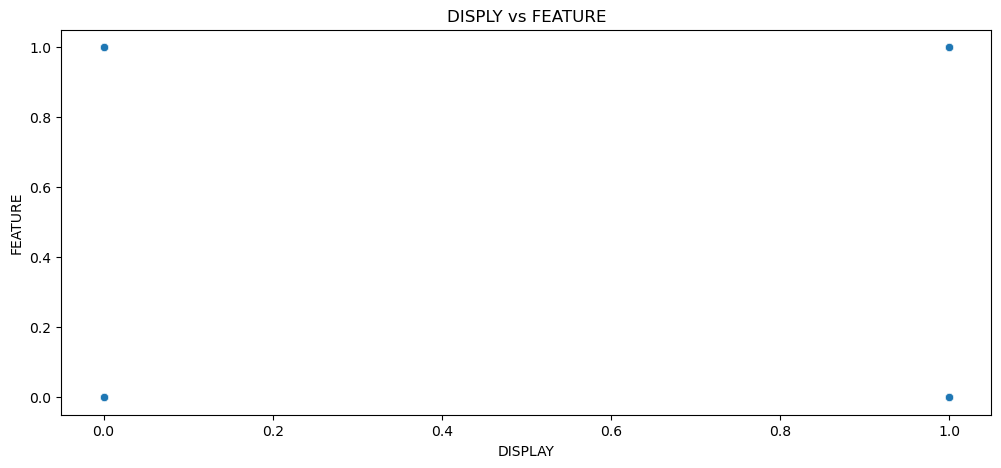

In [6]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['DISPLAY'], y=df['FEATURE'])
plt.title('DISPLY vs FEATURE')
plt.show()

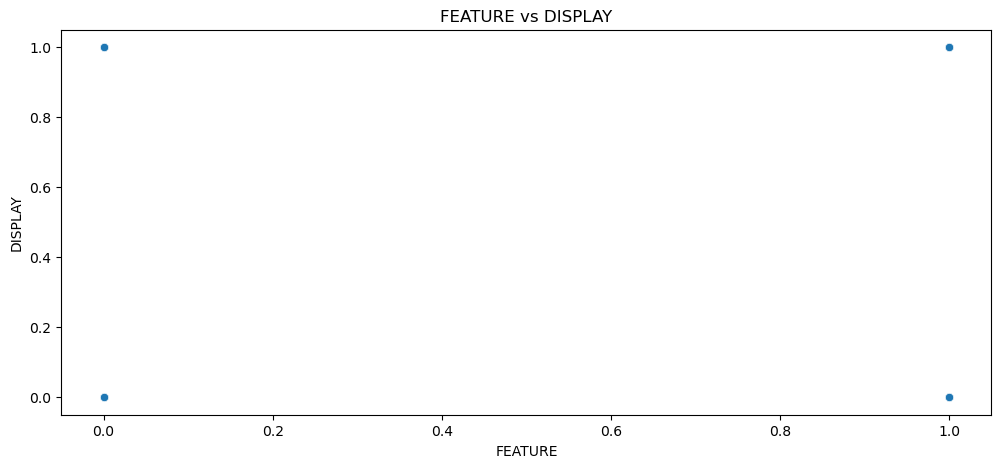

In [8]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['FEATURE'], y=df['DISPLAY'])
plt.title('FEATURE vs DISPLAY')
plt.show()

In [11]:
df['WEEK_END_DATE'] = pd.to_datetime(df['WEEK_END_DATE'], format="%d-%b-%y")  # Convert string date to datetime format

In [12]:
df['Year'] = df['WEEK_END_DATE'].dt.year
df['Month'] = df['WEEK_END_DATE'].dt.month
df['Day'] = df['WEEK_END_DATE'].dt.day


In [13]:
df.drop(columns=['WEEK_END_DATE'], inplace=True)


In [14]:
df = pd.get_dummies(df, columns=['FEATURE', 'DISPLAY'], drop_first=True)


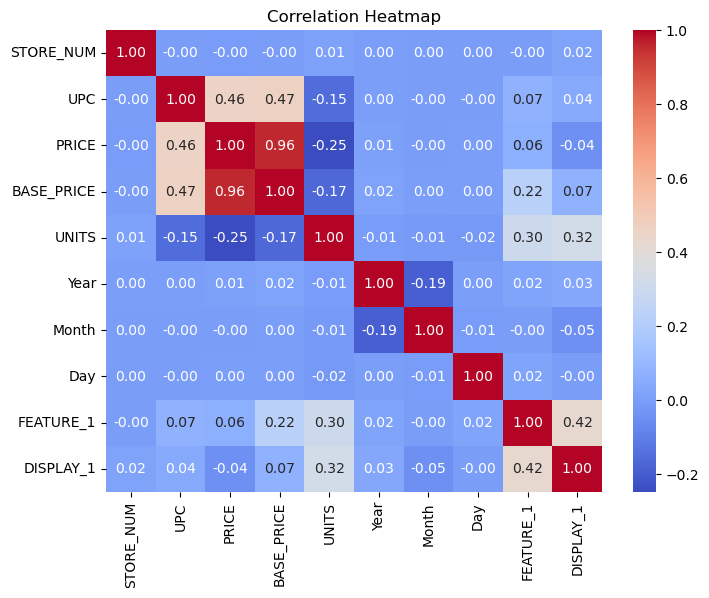

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
df.head()

,STORE_NUM,UPC,PRICE,BASE_PRICE,UNITS,Year,Month,Day,FEATURE_1,DISPLAY_1
0,367,1111009477,1.39,1.57,13,2009,1,14,False,False
1,367,1111009497,1.39,1.39,20,2009,1,14,False,False
2,367,1111085319,1.88,1.88,14,2009,1,14,False,False
3,367,1111085345,1.88,1.88,29,2009,1,14,False,False
4,367,1111085350,1.98,1.98,35,2009,1,14,False,False


In [20]:
X = df[['DISPLAY_1', 'FEATURE_1']]
y = df['FEATURE_1']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0


In [27]:
feature_importance = pd.DataFrame({'FEATURE_1': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

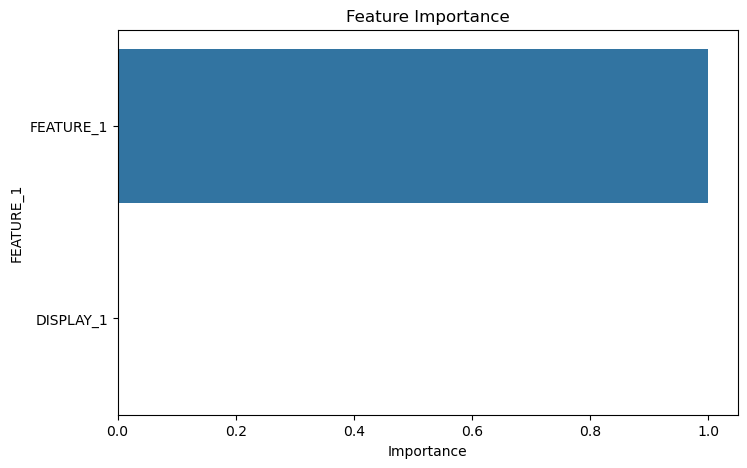

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['FEATURE_1'])
plt.title('Feature Importance')
plt.show()

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
product_data = pd.read_csv('product_data.csv')

In [50]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [51]:
product_data.dtypes

UPC              int64
DESCRIPTION     object
MANUFACTURER    object
CATEGORY        object
SUB_CATEGORY    object
PRODUCT_SIZE    object
dtype: object

In [52]:
product_data['UPC'].nunique()

30

In [53]:
len(set(product_data.UPC).intersection(set(df.UPC)))

30

In [54]:
product_data['CATEGORY'].nunique(), product_data['CATEGORY'].unique()

(4,
 array(['BAG SNACKS', 'ORAL HYGIENE PRODUCTS', 'COLD CEREAL',
        'FROZEN PIZZA'], dtype=object))

In [55]:
product_data['CATEGORY'].isnull().sum()

0

In [56]:
product_data['CATEGORY'].value_counts()

CATEGORY
COLD CEREAL              9
BAG SNACKS               8
FROZEN PIZZA             7
ORAL HYGIENE PRODUCTS    6
Name: count, dtype: int64

In [57]:
product_data['SUB_CATEGORY'].isnull().sum()

0

In [58]:
product_data['SUB_CATEGORY'].nunique()

7

In [59]:
product_data[['CATEGORY','SUB_CATEGORY']].drop_duplicates().sort_values(by = 'CATEGORY')

,CATEGORY,SUB_CATEGORY
0,BAG SNACKS,PRETZELS
5,COLD CEREAL,ALL FAMILY CEREAL
6,COLD CEREAL,ADULT CEREAL
19,COLD CEREAL,KIDS CEREAL
8,FROZEN PIZZA,PIZZA/PREMIUM
3,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC)
16,ORAL HYGIENE PRODUCTS,MOUTHWASH/RINSES AND SPRAYS


In [64]:
category_counts = product_data['CATEGORY'].value_counts()
subcategory_counts = product_data['SUB_CATEGORY'].value_counts()

In [65]:
print(product_data.columns)

Index(['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY',
       'PRODUCT_SIZE'],
      dtype='object')


C:\Users\vicky\AppData\Local\Temp\ipykernel_1104\2042464044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")


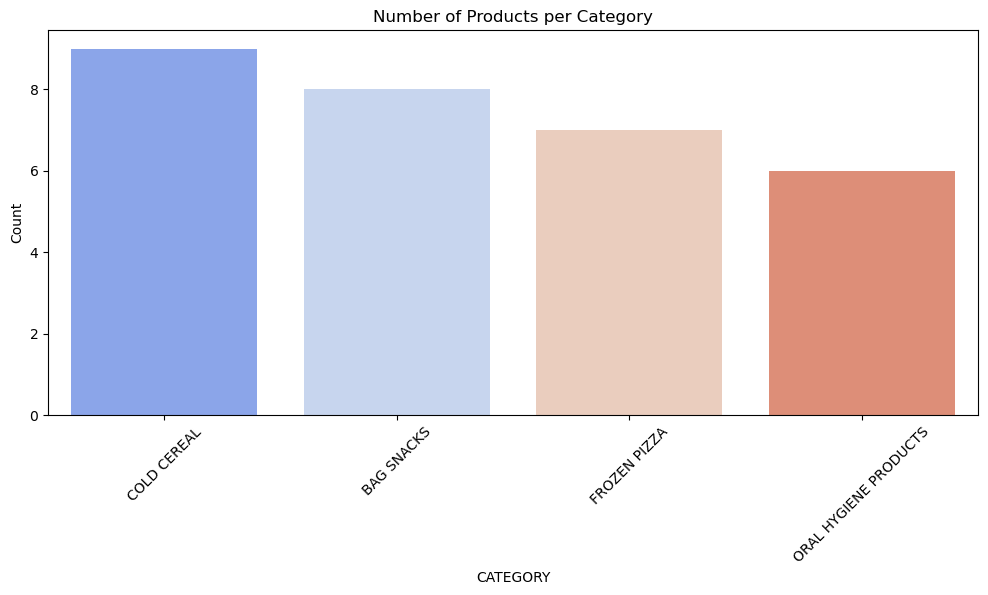

In [66]:
plt.figure(figsize=(12,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Number of Products per Category")
plt.xlabel("CATEGORY")
plt.ylabel("Count")
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_1104\1883717856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette="viridis")


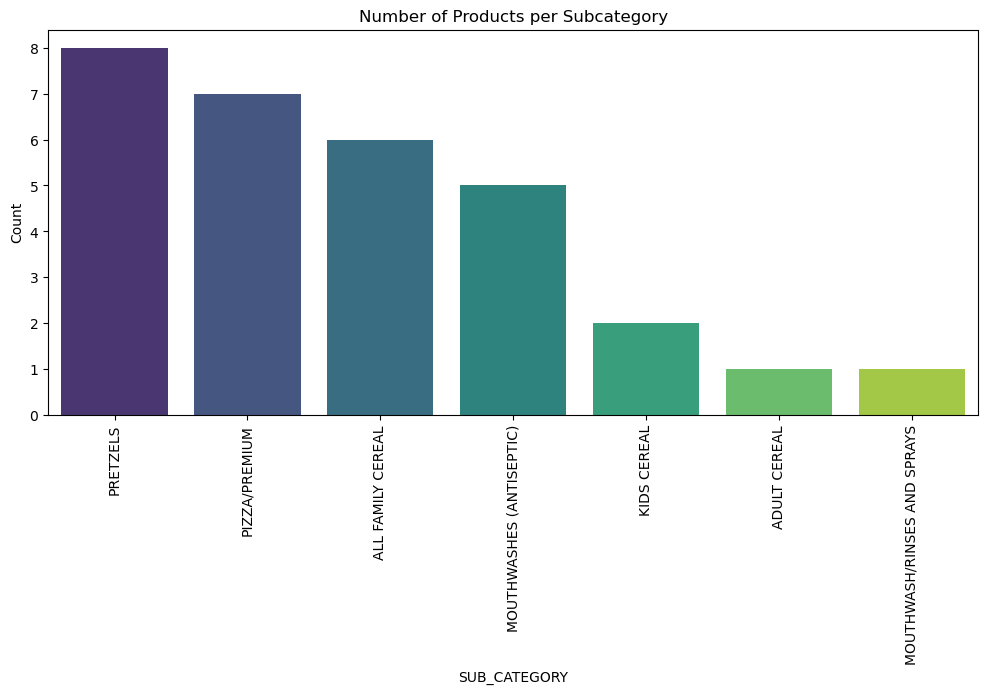

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Products per Subcategory")
plt.xlabel("SUB_CATEGORY")
plt.ylabel("Count")
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_1104\392035036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=product_data['CATEGORY'], y=product_data['MANUFACTURER'], palette="coolwarm")


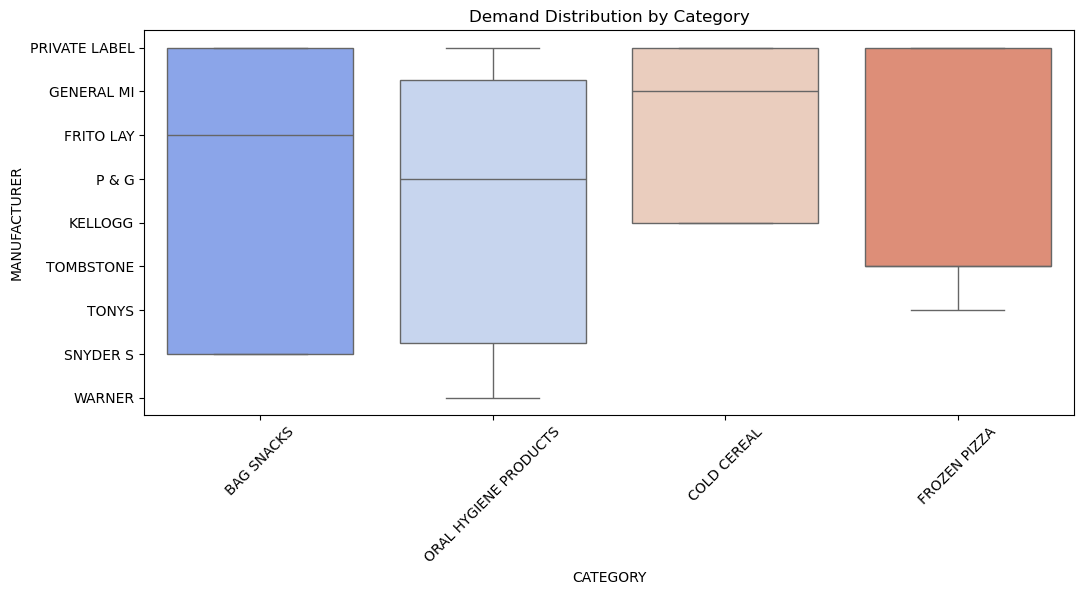

In [69]:
plt.figure(figsize=(12,5))
sns.boxplot(x=product_data['CATEGORY'], y=product_data['MANUFACTURER'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Demand Distribution by Category")
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_1104\3634542009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=product_data['SUB_CATEGORY'], y=product_data['MANUFACTURER'], palette="viridis")


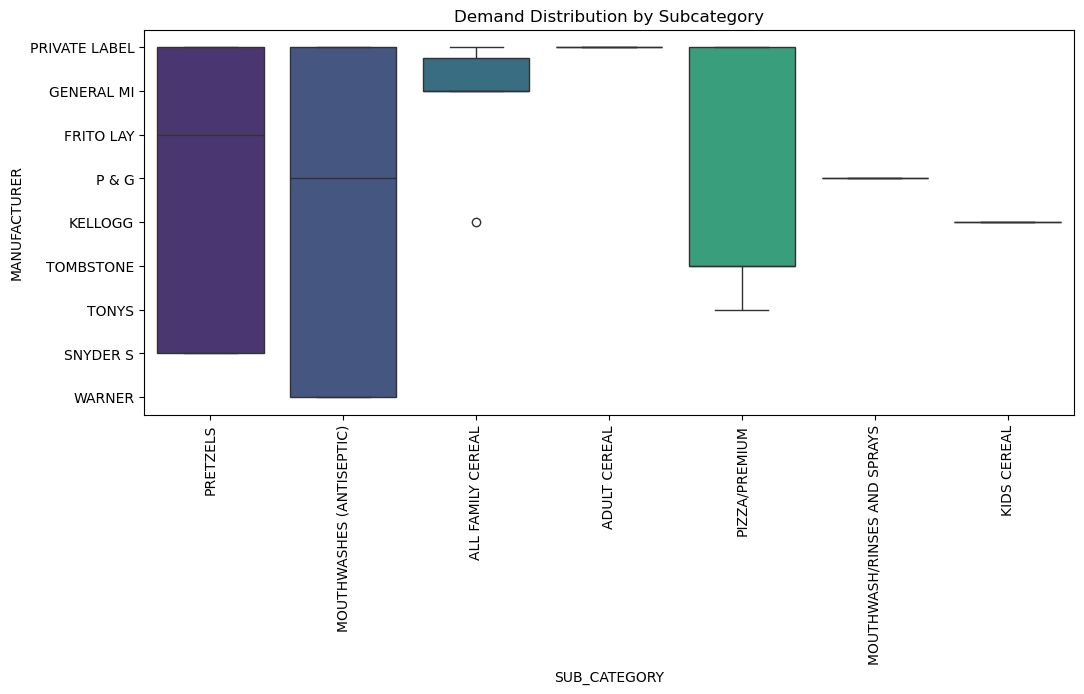

In [70]:
plt.figure(figsize=(12,5))
sns.boxplot(x=product_data['SUB_CATEGORY'], y=product_data['MANUFACTURER'], palette="viridis")
plt.xticks(rotation=90)
plt.title("Demand Distribution by Subcategory")
plt.show()

In [87]:
product_data['MANUFACTURER_Code'] = product_data['MANUFACTURER'].astype('category').cat.codes


In [88]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,MANUFACTURER_Code
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,4
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,4
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,4
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML,4
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML,4


In [91]:
category_subcategory_demand = product_data.pivot_table(index="CATEGORY", columns="SUB_CATEGORY", values="MANUFACTURER_Code", aggfunc="mean")

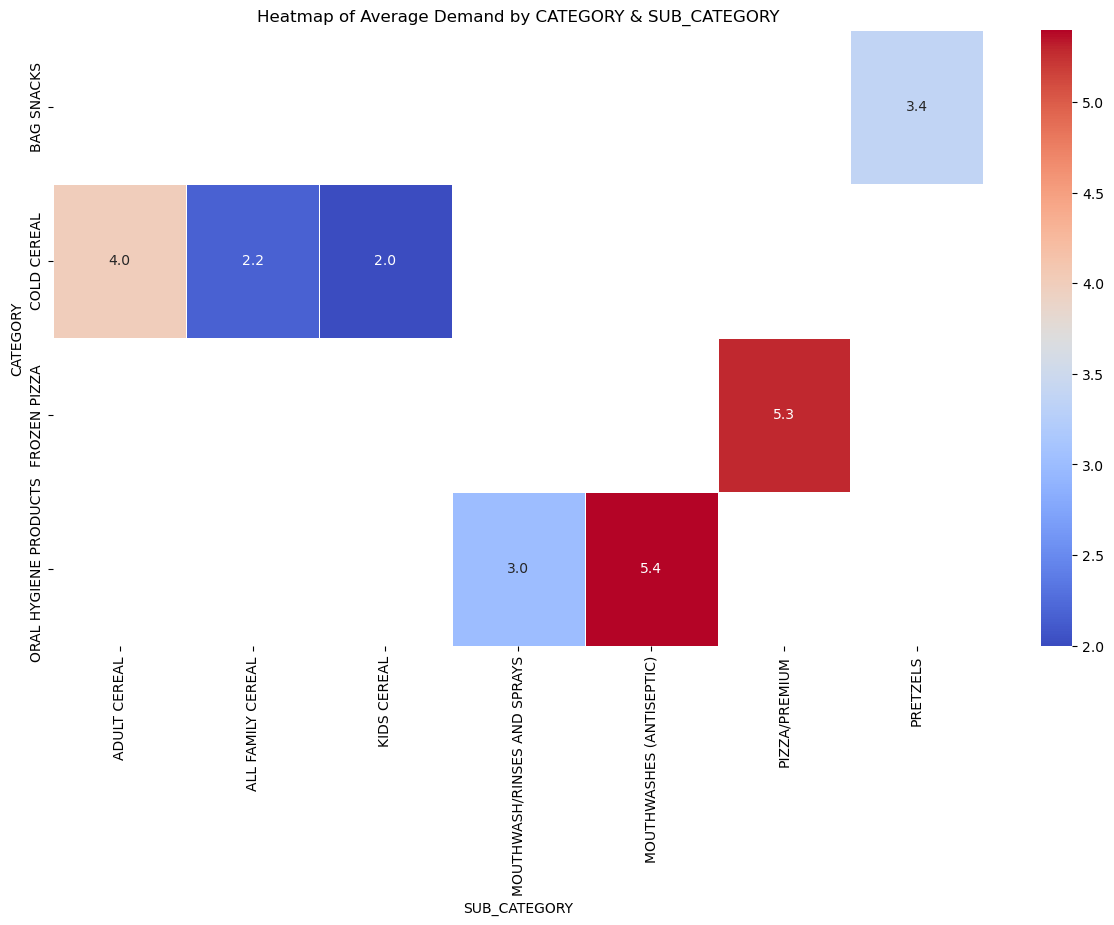

In [92]:
plt.figure(figsize=(15,8))
sns.heatmap(category_subcategory_demand, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap of Average Demand by CATEGORY & SUB_CATEGORY")
plt.show()

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv("train.csv")

In [97]:
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35


C:\Users\vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


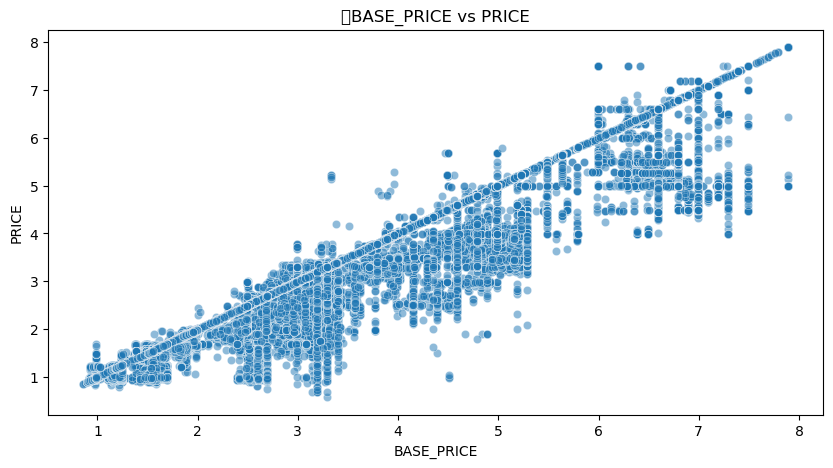

In [101]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['BASE_PRICE'], y=df['PRICE'], alpha=0.5)
plt.title("	BASE_PRICE vs PRICE")
plt.xlabel("BASE_PRICE")
plt.ylabel("PRICE")
plt.show()

In [105]:
df['BASE_PRICE'] = pd.qcut(df['PRICE'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\vicky\AppData\Local\Temp\ipykernel_1104\2004827128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['BASE_PRICE'].astype(str), y=df['PRICE'], palette="coolwarm")


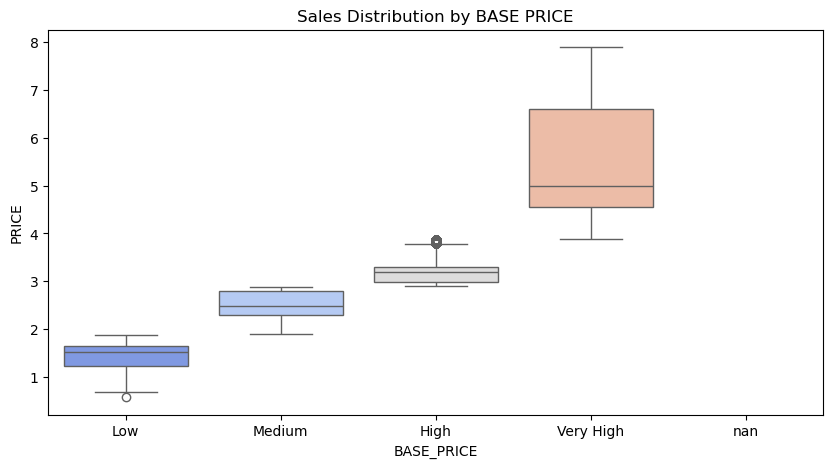

In [108]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['BASE_PRICE'].astype(str), y=df['PRICE'], palette="coolwarm")
plt.title("Sales Distribution by BASE PRICE")
plt.xlabel("BASE_PRICE")
plt.ylabel("PRICE")
plt.show()

In [110]:
df[['BASE_PRICE', 'PRICE']] = df[['BASE_PRICE', 'PRICE']].apply(pd.to_numeric, errors='coerce')

In [111]:
correlation = df[['BASE_PRICE', 'PRICE']].corr()
print("Correlation between BASE_PRICE and PRICE:\n", correlation)

Correlation between BASE_PRICE and PRICE:
             BASE_PRICE  PRICE
BASE_PRICE         NaN    NaN
PRICE              NaN    1.0
